In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from keras import datasets, layers, models

(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(y_train[:5])
print(x_train.shape)

[[6]
 [9]
 [9]
 [4]
 [1]]
(50000, 32, 32, 3)


In [2]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

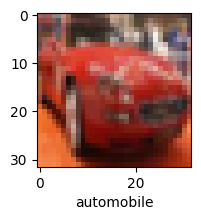

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

plot_sample(x_train,y_train,5)

In [6]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [7]:
cnn.fit(x_train,y_train,epochs=10)
cnn.evaluate(x_test,y_test)

Epoch 1/10
1563/1563 [==============================] - 92s 57ms/step - loss: 1.5105 - accuracy: 0.4564
Epoch 2/10
1563/1563 [==============================] - 87s 55ms/step - loss: 1.1588 - accuracy: 0.5939
Epoch 3/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.0255 - accuracy: 0.6400
Epoch 4/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9453 - accuracy: 0.6677
Epoch 5/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.8775 - accuracy: 0.6931
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8275 - accuracy: 0.7125
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7812 - accuracy: 0.7296
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7421 - accuracy: 0.7405
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7097 - accuracy: 0.7525
Epoch 10/10
313/313 [==============================] - 6s 17ms/s

[0.9159657955169678, 0.692799985408783]

In [11]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification_report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 4s 13ms/step
classification_report: 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      1000
           1       0.81      0.81      0.81      1000
           2       0.56      0.60      0.58      1000
           3       0.52      0.50      0.51      1000
           4       0.60      0.67      0.63      1000
           5       0.62      0.61      0.62      1000
           6       0.70      0.85      0.77      1000
           7       0.79      0.65      0.72      1000
           8       0.83      0.78      0.80      1000
           9       0.80      0.75      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

